<div style="display: flex; justify-content: space-between; font-size: 1.5em; font-weight: bold;">
  <div>Aayush Bajaj</div>
  <div>z5362216</div>
  <div>14/07/2025</div>
</div>

# 0. EDA (Exploratory Data Analysis)

Image dimensions: 652x670x3


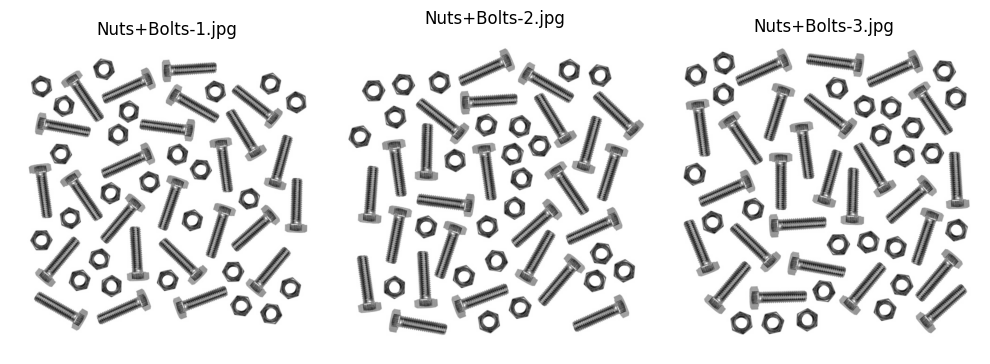

In [2]:
import cv2
import matplotlib.pyplot as plt

prefix = "./lab4/img"
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
# plot three images side by side
for i in range(3):
    file = f"Nuts+Bolts-{i+1}.jpg"
    img = cv2.imread(f"{prefix}/{file}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img_rgb)
    ax[i].set_title(file)
    ax[i].axis('off')
# check dimensions
print(f"Image dimensions: {img.shape[0]}x{img.shape[1]}x{img.shape[2]}")
plt.tight_layout()
plt.show()
    

# 1. Pipeline

In [ ]:
"""Docstring:
This script implements a pipeline to count the number of nuts and bolts in an image.
It uses OpenCV for image processing and matplotlib for visualization.
The pipeline includes:
1. Grayscale conversion
2. Thresholding to create a binary image
3. Morphological operations to clean up the binary image
4. Connected components analysis to count the number of separate regions
5. Size thresholding to differentiate between nuts and bolts based on area
6. Returns a message indicating whether the number of nuts and bolts is correct or if adjustments are needed.

IMPORTANT: this implementation assumes that nuts are smaller than bolts, and uses a size threshold to differentiate them.
in real-world applications other features such as aspect ratio or contours may be appropriate for a more robust segmentation.

HYPERPARAMETERS:
- `expected_nuts`: expected number of nuts in the image (default: 25)
- `expected_bolts`: expected number of bolts in the image (default: 25)
- `debug`: if True, shows plots (default: True)
"""
def nuts_bolts_pipeline(image, expected_nuts=25, expected_bolts=25, debug=True):
    
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply intensity thresholding using automatically calculated threshold
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # watch the _INV

    if debug:
        #check binary image
        plt.figure(figsize=(5, 5))
        plt.imshow(thresh, cmap='gray')
        plt.title("Binary Image")
        plt.axis('off')
        plt.show()

    # use binary morphology operators to fill holes / filter out noise pixels in segmentation:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # use connected components algorithm to identify and count the separate regions:
    num_labels, labels_im, stats, _ = cv2.connectedComponentsWithStats(thresh)

    if debug:
        print(f"Number of labels found: {num_labels}")  # subtract 1 for background

    # use size threshold to determine whether a region is a nut or a bolt

    size_threshold = 2000  # tuning

    nuts_count = 0
    bolts_count = 0

    for label in range(1, num_labels):

        # apply mask to each label to visualise the region

        mask = (labels_im == label).astype('uint8') * 255
        area = stats[label, cv2.CC_STAT_AREA]

        # visualise the region

        if debug:
            # display the region
            region = cv2.bitwise_and(image, image, mask=mask)
            plt.figure(figsize=(1, 1))
            plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
            plt.title(f"Region {label} - Area: {area}")
            plt.axis('off')
            plt.show()
        
        if area > size_threshold:
            bolts_count += 1
        else:
            nuts_count += 1

    # plots segmentation results
    if debug:
        plt.figure(figsize=(4, 2))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(thresh, cmap='gray')
        plt.title("Thresholded Image")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        return nuts_count, bolts_count
    
    if nuts_count == expected_nuts and bolts_count == expected_bolts:
        return "All good"
    elif nuts_count < expected_nuts:
        return f"Add {expected_nuts - nuts_count} nuts"
    elif bolts_count < expected_bolts:
        return f"Add {expected_bolts - bolts_count} bolts"
    elif nuts_count > expected_nuts:
        return f"Remove {nuts_count - expected_nuts} nuts"
    elif bolts_count > expected_bolts:
        return f"Remove {bolts_count - expected_bolts} bolts"


# 2. Results

In [50]:
# test on all three images
for i in range(3):
    file = f"Nuts+Bolts-{i+1}.jpg"
    img = cv2.imread(f"{prefix}/{file}")
    result = nuts_bolts_pipeline(img, expected_nuts=25, expected_bolts=25, debug=False)
    print(f"Result for {file}: {result}")

Result for Nuts+Bolts-1.jpg: All good
Result for Nuts+Bolts-2.jpg: Add 1 nuts
Result for Nuts+Bolts-3.jpg: Remove 1 bolts


## a) proof of work

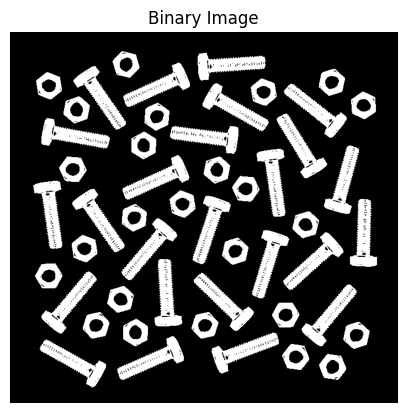

Number of labels found: 51


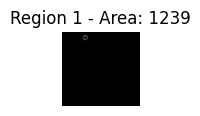

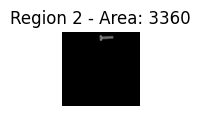

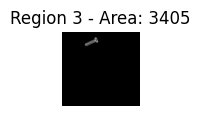

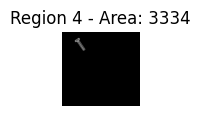

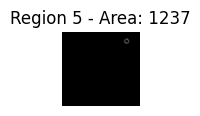

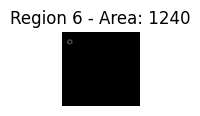

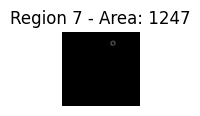

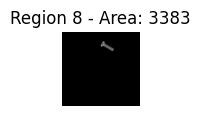

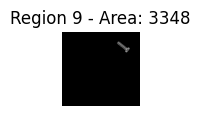

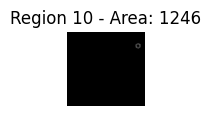

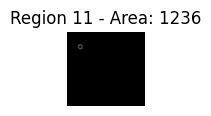

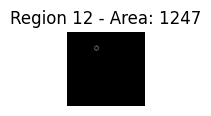

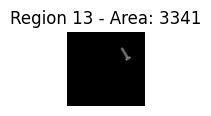

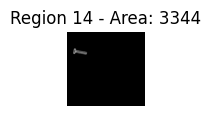

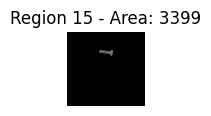

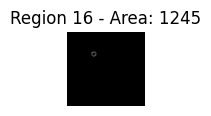

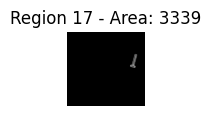

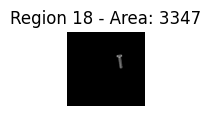

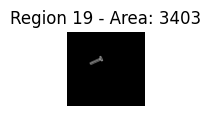

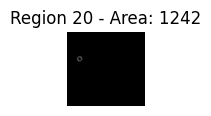

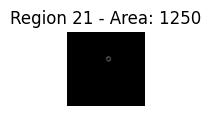

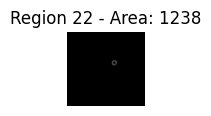

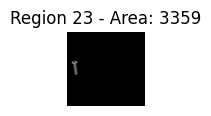

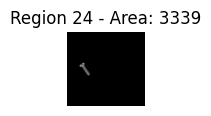

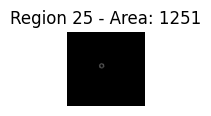

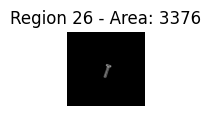

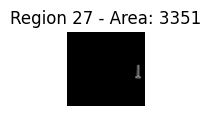

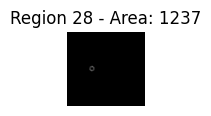

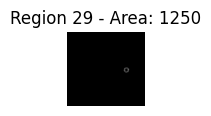

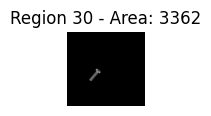

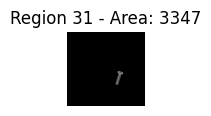

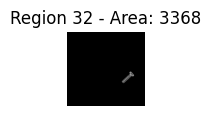

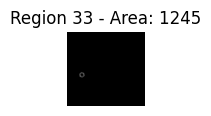

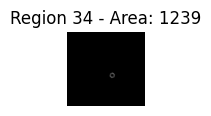

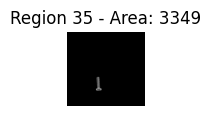

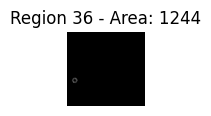

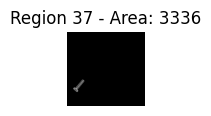

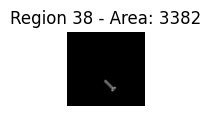

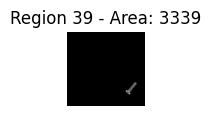

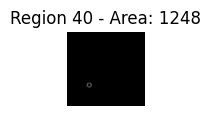

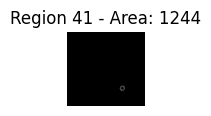

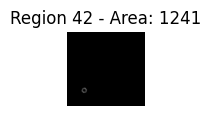

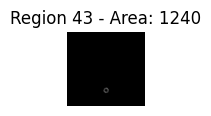

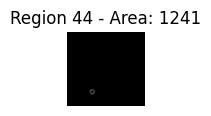

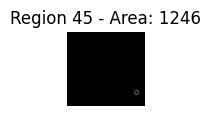

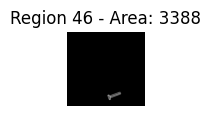

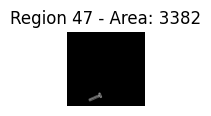

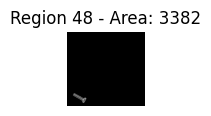

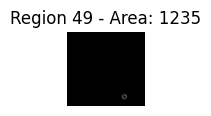

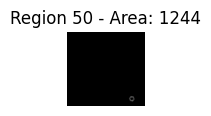

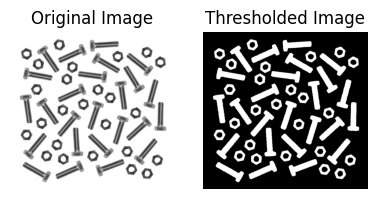

Result for Nuts+Bolts-1.jpg: (25, 25)


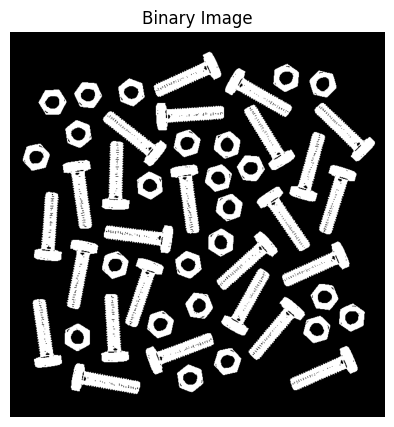

Number of labels found: 50


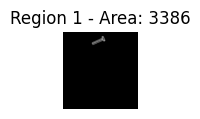

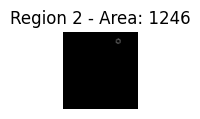

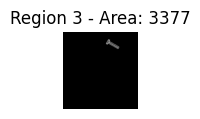

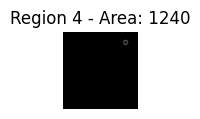

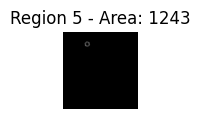

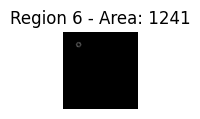

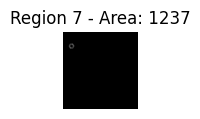

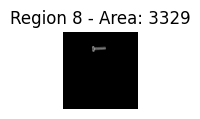

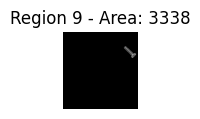

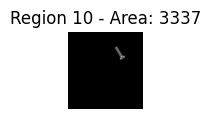

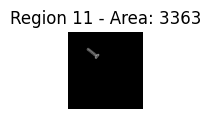

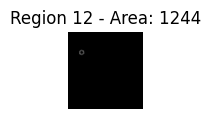

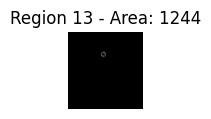

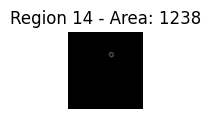

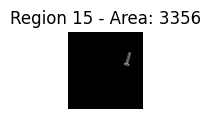

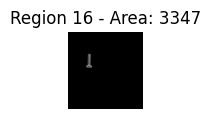

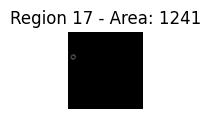

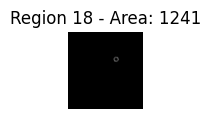

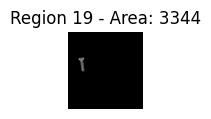

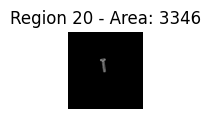

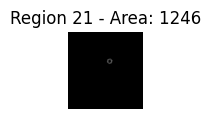

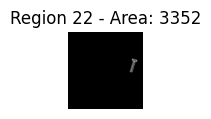

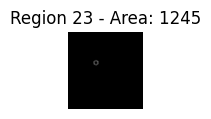

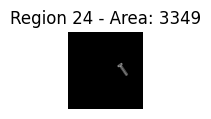

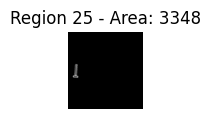

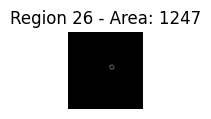

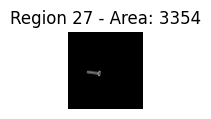

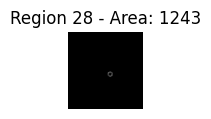

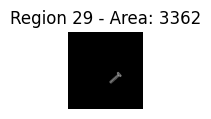

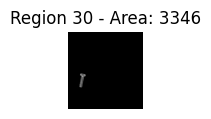

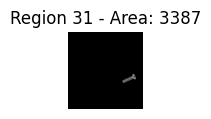

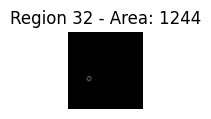

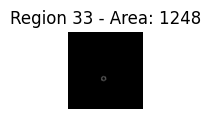

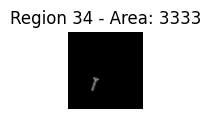

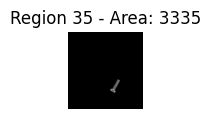

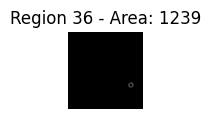

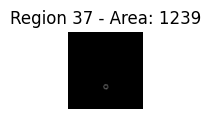

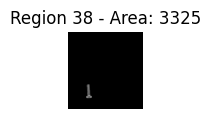

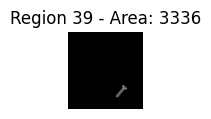

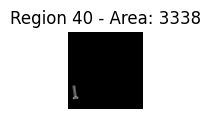

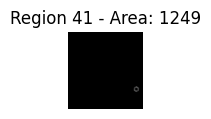

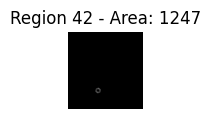

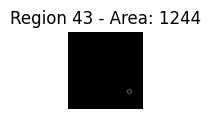

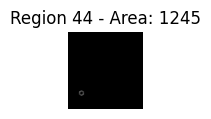

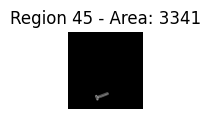

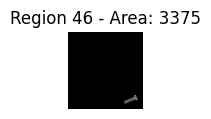

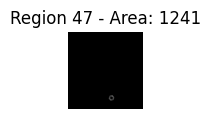

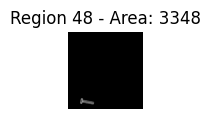

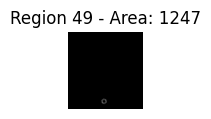

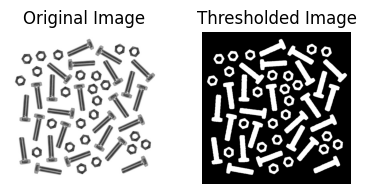

Result for Nuts+Bolts-2.jpg: (24, 25)


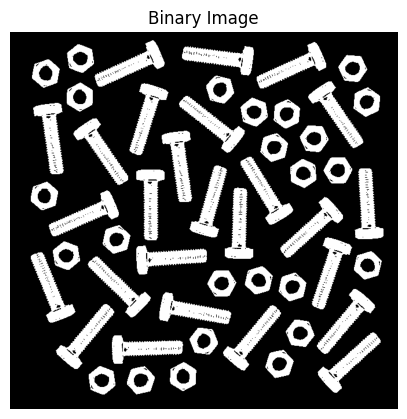

Number of labels found: 52


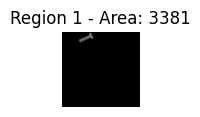

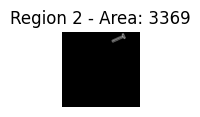

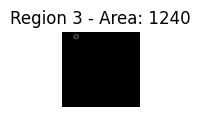

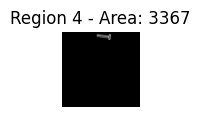

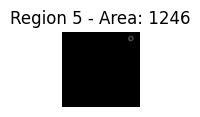

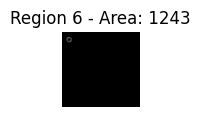

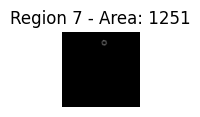

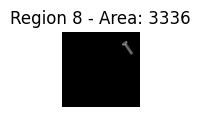

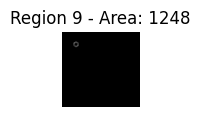

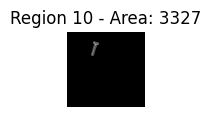

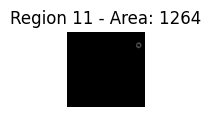

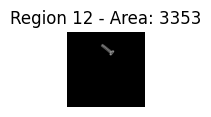

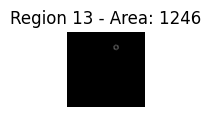

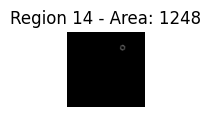

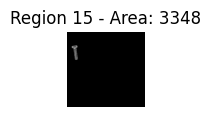

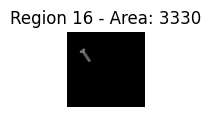

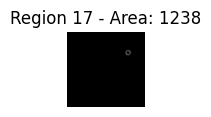

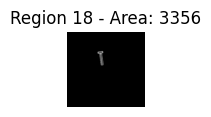

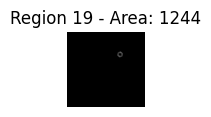

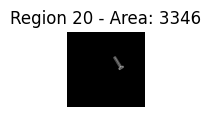

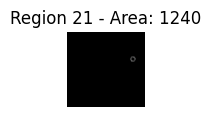

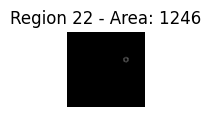

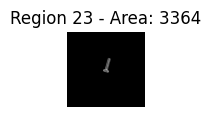

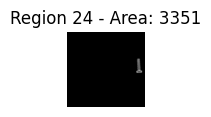

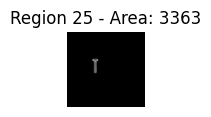

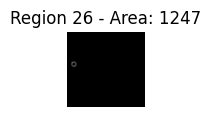

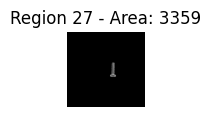

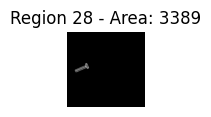

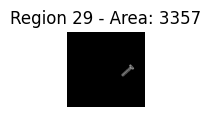

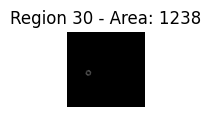

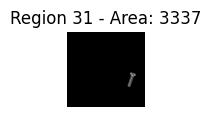

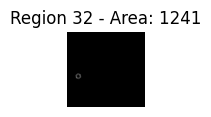

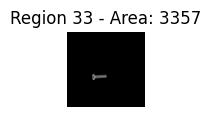

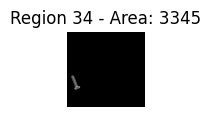

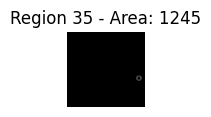

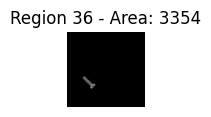

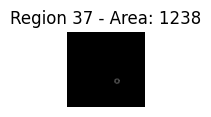

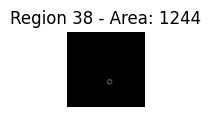

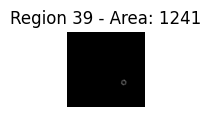

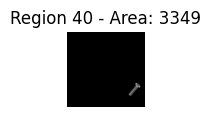

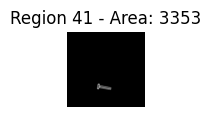

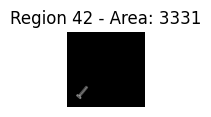

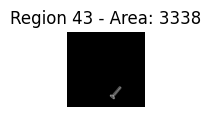

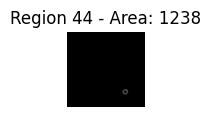

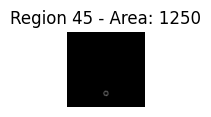

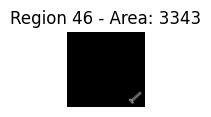

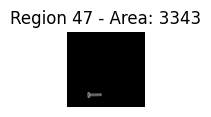

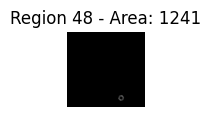

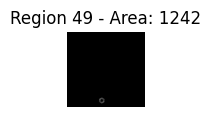

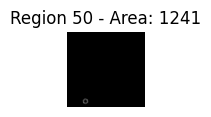

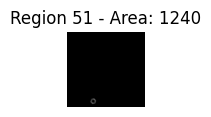

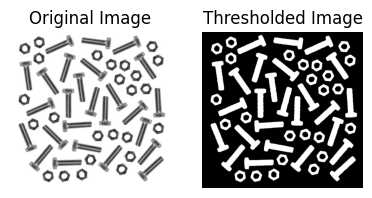

Result for Nuts+Bolts-3.jpg: (25, 26)


In [51]:
for i in range(3):
    file = f"Nuts+Bolts-{i+1}.jpg"
    img = cv2.imread(f"{prefix}/{file}")
    result = nuts_bolts_pipeline(img, expected_nuts=25, expected_bolts=25, debug=True)
    print(f"Result for {file}: {result}")